# Project: Instance-Based (k-Nearest Neighbors (kNN))
## Name: Benjamin Nguyen
This Jupyter Notebook Starter File provides a basic outline for your solutions. For detailed instructions, please refer to the assignment on Canvas. Complete all your work for this project in this same Jupyter Notebook file, which you will submit:
- Code:
  - Insert your code where you see #Insert Code Here.
  - Ensure all code is well-commented and easy to understand.
  - Use clear and descriptive variable names.
- Questions:
  - You will be provided guided questions in a separate assignment vs. here in the code to give you the opportunity to demonstrate a deep understanding of the concepts through thorough explanations and critical thinking.

In [2]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)
warnings.simplefilter(action='ignore', category=FutureWarning)

#Some recommended libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer



# The Dataset

In [3]:
# Load the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv(url, names=column_names, na_values='?')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Data Preprocessing

In [5]:
#Insert Code Here
#Insert Code Here

print(df.shape)
print(df.columns)
print(df.describe())


(303, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  3

In [6]:
print("\nTarget value counts (original 0-4):\n", df["target"].value_counts(dropna=False))
df["target_bin"] = (df["target"] > 0).astype(int)
print("\nTarget value counts (binary 0/1):\n", df["target_bin"].value_counts())


Target value counts (original 0-4):
 target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Target value counts (binary 0/1):
 target_bin
0    164
1    139
Name: count, dtype: int64


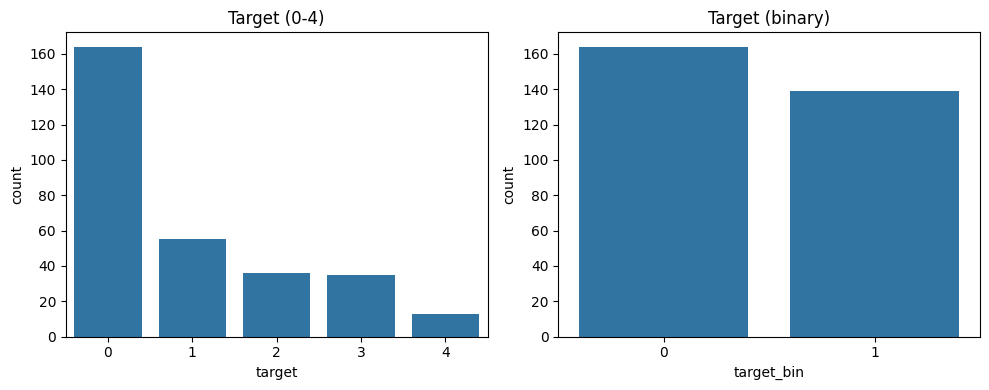

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.countplot(x="target", data=df, ax=ax[0])
ax[0].set_title("Target (0-4)")
sns.countplot(x="target_bin", data=df, ax=ax[1])
ax[1].set_title("Target (binary)")
plt.tight_layout()
plt.show()

In [8]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
target        0
target_bin    0
dtype: int64


In [9]:

# Fill numeric (ca) with median
df['ca'] = df['ca'].fillna(df['ca'].median())

# Fill categorical (thal) with mode
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)


Missing values per column:
 age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
target_bin    0
dtype: int64


In [10]:
y = df["target_bin"]
X = df.drop(columns=["target","target_bin"])


# Columns by type
numeric_features = ["age","trestbps","chol","thalach","oldpeak","ca"]  
binary_passthrough = ["sex","fbs","exang"]  
categorical_features = ["cp","restecg","slope","thal"]  # treat as categorical


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("bin", "passthrough", binary_passthrough),
    ]
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit preprocessor on train only; transform both train and test
X_train_prep = preprocess.fit_transform(X_train)
X_test_prep  = preprocess.transform(X_test)

# Building the kNN Model

In [11]:
#Insert Code Here
knn = KNeighborsClassifier(
    n_neighbors=7,          # try 5,7,9...
    metric="minkowski",     # Euclidean distance
    p=2,                    # p=2 -> Euclidean; p=1 -> Manhattan
    weights="distance"      # or "uniform"
)


# Full pipeline = preprocessing + model
clf = Pipeline(steps=[("preprocess", preprocess),
                     ("model", knn)])

clf.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Evaluating the Model

Test Accuracy: 0.934

Confusion Matrix:
 [[30  3]
 [ 1 27]]

Classification Report:
               precision    recall  f1-score   support

           0      0.968     0.909     0.938        33
           1      0.900     0.964     0.931        28

    accuracy                          0.934        61
   macro avg      0.934     0.937     0.934        61
weighted avg      0.937     0.934     0.935        61



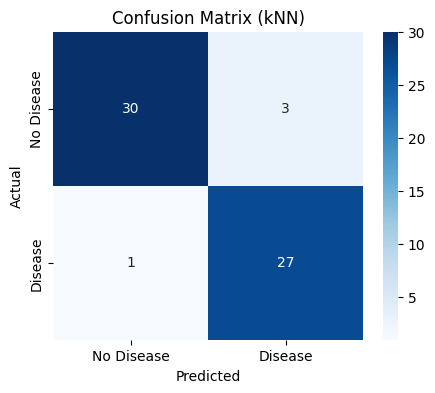

In [12]:
# Predict
y_pred = clf.predict(X_test)

# Accuracy
print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 3))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease","Disease"], yticklabels=["No Disease","Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (kNN)")
plt.show()

## For the Model Selection Project, you will STOP HERE! 
During Units 4, 5, and 6, we will explore and learn additional techniques, and then revisit these projects to apply the below:
- Model evaluation and parameter tuning
- Explanatory visualizations and package your results with data storytelling

# Tuning Model Parameters (Completed in Unit 4)

In [18]:
#Insert Code Here

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ----- Hyperparameter grid -----
param_grid = {
    "model__n_neighbors": [3, 5, 7, 9, 11, 15],
    "model__weights": ["uniform", "distance"],
    "model__metric": ["euclidean", "manhattan", "minkowski"],
    "model__p": [1, 2],  # only used when metric='minkowski'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=cv,
    scoring={
        "accuracy": "accuracy",
        "precision": "precision",
        "recall": "recall",
        "f1": "f1",
        "roc_auc": "roc_auc",
    },
    refit="f1",       # pick the model with best F1
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)




Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END model__metric=euclidean, model__n_neighbors=3, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__metric=euclidean, model__n_neighbors=3, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__metric=euclidean, model__n_neighbors=3, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__metric=euclidean, model__n_neighbors=3, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__metric=euclidean, model__n_neighbors=3, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model__metric=euclidean, model__n_neighbors=3, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model__metric=euclidean, model__n_neighbors=3, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__metric=euclidean, model__n_neighbors=3, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__metric=euclidean, model__n_nei

,estimator,Pipeline(step...'distance'))])
,param_grid,"{'model__metric': ['euclidean', 'manhattan', ...], 'model__n_neighbors': [3, 5, ...], 'model__p': [1, 2], 'model__weights': ['uniform', 'distance']}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall', ...}"
,n_jobs,-1
,refit,'f1'
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...), ...]"


# Evaluating the Tuned Model (Completed in Unit 4)

Best params: {'model__metric': 'manhattan', 'model__n_neighbors': 9, 'model__p': 1, 'model__weights': 'distance'}
Best CV F1: 0.806


,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_roc_auc,param_model__n_neighbors,param_model__weights,param_model__metric,param_model__p,rank_test_f1
37,0.830442,0.856522,0.765613,0.806462,0.874060,9,distance,manhattan,1,1
61,0.830442,0.856522,0.765613,0.806462,0.874060,9,distance,minkowski,1,1
39,0.830442,0.856522,0.765613,0.806462,0.874060,9,distance,manhattan,2,1
38,0.826276,0.855093,0.756522,0.800925,0.867190,9,uniform,manhattan,2,4
36,0.826276,0.855093,0.756522,0.800925,0.867190,9,uniform,manhattan,1,4
60,0.826276,0.855093,0.756522,0.800925,0.867190,9,uniform,minkowski,1,4
30,0.826531,0.853607,0.756522,0.798536,0.877799,5,uniform,manhattan,2,7
28,0.826531,0.853607,0.756522,0.798536,0.877799,5,uniform,manhattan,1,7
52,0.826531,0.853607,0.756522,0.798536,0.877799,5,uniform,minkowski,1,7
53,0.822364,0.845713,0.756522,0.795051,0.880245,5,distance,minkowski,1,10



Test accuracy: 0.951

Classification Report:
               precision    recall  f1-score   support

           0      0.969     0.939     0.954        33
           1      0.931     0.964     0.947        28

    accuracy                          0.951        61
   macro avg      0.950     0.952     0.951        61
weighted avg      0.951     0.951     0.951        61

Precision: 0.931 | Recall: 0.964 | F1: 0.947


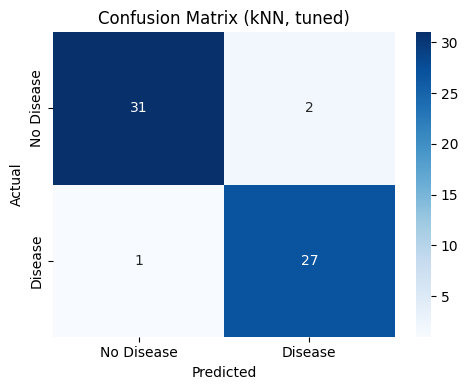

In [19]:
#Insert Code Here

print("Best params:", grid.best_params_)
print("Best CV F1:", round(grid.best_score_, 3))

cvres = pd.DataFrame(grid.cv_results_)
cols = ["mean_test_accuracy","mean_test_precision","mean_test_recall","mean_test_f1","mean_test_roc_auc","param_model__n_neighbors","param_model__weights","param_model__metric","param_model__p","rank_test_f1"]
display(cvres.sort_values("rank_test_f1")[cols].head(10))
best_clf = grid.best_estimator_

y_pred = best_clf.predict(X_test)
print("\nTest accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# Binary metrics (pos label = 1). Change 'pos_label' if your positive class is 0.
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
print(f"Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease","Disease"],
            yticklabels=["No Disease","Disease"])
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix (kNN, tuned)")
plt.tight_layout(); plt.show()


In this section I tuned a k-Nearest Neighbors classifier inside a preprocessing pipeline (median imputation + standardization for numerics, one-hot for categoricals, passthrough for binaries) using a stratified 5-fold GridSearchCV to avoid bias from a single split. The grid explored n_neighbors ∈ {3,5,7,9,11,15}, distance weights vs uniform, and Euclidean/Manhattan/Minkowski (with p ∈ {1,2}). The best configuration selected by cross-validated F1 was k=9 with distance weighting and the Manhattan metric (p=1), yielding mean CV F1 ≈ 0.806. Evaluated on the held-out test set, this model achieved accuracy 0.951 (macro-F1 0.951), with class-wise F1 of 0.954 (no disease) and 0.947 (disease), precision 0.931 and recall 0.964 for the positive class.

The results suggest that (i) distance weighting helped prioritize closer neighbors, (ii) Manhattan distance handled mixed-scale/encoded features slightly better than Euclidean here, and (iii) stratified CV provided a robust model choice. Overall, tuning improved generalization and class balance versus untuned baselines; the higher test performance than CV mean likely reflects benign sampling variance on this dataset rather than overfitting, but could be monitored with repeated CV or nested CV if needed.

# Visualizing Results (Completed in Units 4 and 6)

In [14]:
#Insert Code Here